Title: T-Tests: Intro to Key Terms & One Sample t-test
Slug: intro-t-test-terms-and-one-sample-test
Summary: Learn about t-tests at a high level, the t-distribution, how to calculate t-critical values, degrees of freedom and an overview of the three types of tests. Example of one sample t-test. Lessons in Python and use statistical packages.
Date: 2019-2-20 20:20  
Category: Math
Subcategory: Inferential Statistics
PostType: Article
Keywords: one sample t-test python
Tags: t-tests, python
Authors: Dan Friedman

A t-test is a type of statistical hypothesis test. This type of test can determine if 1) a sample mean is *significantly* different from a known population mean or 2) a sample mean is *significantly* different from another sample mean. Typically, we associate t-tests with the latter. This post will walk through a detailed example of just 1). 

There are three distinct types of t-tests: one sample t-tests, dependent sample t-tests and independent sample t-tests. Each type of test involves a comparison of *two* groups. 

Hypothesis tests for comparing *multiple* groups are called <a href='https://en.wikipedia.org/wiki/Analysis_of_variance'>analysis of variance</a> (ANOVA) and will be covered in another post.

Each of the three types of tests involve the same variable tested in the two groups. For example, a t-test can compare scores on the *same* final exam for one teacher's students and another teacher's students. However, if one teacher provides an exam with different questions than another teacher, a simple hypothesis test can't adequately compare the students' performance against the other class because there are **lurking variables**. These are variables that are not explained in the single score of student's performance but would affect the interpretation of the t-tests results. Some examples of lurking variables are difficulty of questions, number of questions on the exam and time allotted to complete the exam.

### Comparison: z-tests vs. t-tests

Both z-tests and t-tests are statistical hypothesis tests.

Comparison field | z-test | t-test
--- | --- | ---
Purpose | compares if the means of two datasets are *significantly* different from each other when population variance is known | compares if the means of two sets of data are *significantly* different when population variance is unknown
distribution used | normal | student's t
population variance | known | unknown
sample size | large ($n>30$) | small ($n<30$)

### Overview of Three Types of t-tests

type of test | group 1 | group 2 | purpose  
--- | --- | --- | --- 
one sample t-test | population | sample | tests whether the mean of a population is *significantly* different than a sample mean
dependent sample t-test | sample | sample | tests whether the difference in means of two depenendent samples is *significantly* different 
independent sample t-test | sample | sample | tests whether the difference in means of two independent samples is *significantly* different 

Each of these tests is considered a <a href='https://en.wikipedia.org/wiki/Parametric_statistics'>*parametric test*</a> because they assume that data comes from a population that meets specific probability distribution standards. These data requirements will be discussed individually for each test in separate posts.

### One Sample t-test Descriptive Example

There's an academy that teaches students new to music how to play the guitar in just three months. At the end of the three months, students are assessed on their performance of the song *Ziggy Stardust*. For their performance, a proctor counts the number of errors performed by each student. There have been hundreds of instructors at this academy over the year and they all utilized the same methods for teaching. However, last year a new teacher, Mr. Brown, utilized a new method to teach a random group of 28 students in that 3 month period.

Each year, the academy updates their mean value for the number of errors on student's final performance. However, they don't record all the individual historical student scores for privacy purposes. Therefore, the population variance is unknown. 

A calculation was also made for the mean number of errors by Mr. Brown's students. Does Mr. Brown's teaching *significantly* decrease the number of errors in student's performance compared to the population of students taught at the academy?

$H_{o}: \bar{x}_{\textrm{Mr. Brown}}>=\mu_{population}$

$H_{a}: \bar{x}_{\textrm{Mr. Brown}}<\mu_{population}$

In a one sample t-test like this, you could perform it if Mr. Brown taught at the academy or outside of the academy. However, there's other factors to consider in proper experiment design to ensure the results have merit. For this example, I used the more logical t-test design and included Mr. Brown as one of the many teachers at the academy.

### Dependent Sample t-test Descriptive Example

A sample of 19 people were told to lie in bed ready to fall asleep at 10pm every night and would be woken up by an alarm at 6:30am for 15 days in a row. In that period, they tried to sleep as much as possible. With each night's sleep, sensors and a computer helped record a measurement of that person's total hours slept. This same test was later performed for the same group of people under the same circumstances, but with one difference: each night a person took a sleeping pill at 9:30pm. 

After all the data was collected, I calculated the mean number of hours slept for people without using the pill and with using the pill. Does the sleeping pill help *significantly* increase the average hours slept for the group than without the pill? 

$H_{o}:\mu_{pill}>= \mu_{\textrm{no pill}}$

$H_{a}:\mu_{pill}>\mu_{\textrm{no pill}}$

This is considered a pretest posttest type of t-test for dependent samples. The samples are considered *dependent* on one another because the *same* people who took the sleep test without the pills later took the test again with sleeping pills.

The data was collected from two different samples. However, in the hypotheses above, I use symbols of $\mu$ (a population mean) instead of $\bar{x}$ (a sample mean). This may seem confusing since we don't *exactly* know the values of $\mu$ for either sample from the start of the test.

These hypotheses are not about the *exact* provided data. Rather, they're inferences about the *expected* population means from which the samples come from. A proper t-test analysis performs calculations to help *infer* what the *expected* population mean of each sample would be given just a sample mean. This description is part of the field of **inferential statistics**: use of a random sample of data taken from a population to describe and make inferences about the population. These inferences are important because they help to explain what *would likely* happen if this same sleeping test was performed on a larger population of people. 

Typically, in a dependent t-test example such as this, the exact populations data with individual observations is uknown or one is unable to access the population data.

### Independent Sample t-test Descriptive Example

There was a sample of 20 professional basketball players in 1940 that attempted to jump as high as they could and measurements were taken on their reach by the top of their hand. The same test was performed on a sample of 20 professional basketball players in 2019. After all this data was collected, I calculated the mean height in inches reached by the sample of players in 1940 and 2019. Do professional basketball players in 2019 jump *significantly* higher on average than basketball players in 1940?

Similar to the example with dependent t-tests above, these hypotheses are an *inference* on the *expected* true population means from which each sample comes from.

$H_{o}$: $\mu_{2019}<=\mu_{1940}$

$H_{a}$: $\mu_{2019}>\mu_{1940}$

### Setup Code

#### Import Modules

In [37]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### Set Visualization Style

In [38]:
sns.set_context('talk')
sns.set_style("darkgrid")

### Steps to Perform One Sample T-Test

1) Setup the experiment to record measurements from a sample.

2) Set an alpha level for the test, a null hypothesis and alternative hypothesis.

3) Compute the sample mean, sample size and sample standard deviation.
    - These calculations will be used later in steps 6 and 7.

4) Obtain the population mean for the same variable measured. 

5) Calculate the t-critical value.

6) Determine if the data meets the proper requirements to perform a one-sample t-test.

7) Calculate the t-statistic.

8) Compare the t-statistic to the t-critical value. Interpret results of the experiment based on the original hypotheses.

### 1) Setup Experiment

I'll continue with the descriptive example for the one-sample t-test mentioned above. The setup was designed so the count of errors for all student's performances of *Ziggy Stardust* by Mr. Brown's students were recorded.

Assign a python list of errors of students in the sample to the variable `sample_student_errors`.

In [39]:
sample_student_errors = [5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 6, 6, 6, 6, 7, 7, 7, 3, 3, 3, 3, 2, 2, 8, 8, 9]

### 2) Set an Alpha Level and Original Hypotheses

The alpha level for this experiment will be $0.05$.

In [40]:
alpha = 0.05

Does Mr. Brown's teaching *significantly* decrease the number of errors in student's performance compared to the population of students taught at the academy?

$H_{o}: \bar{x}_{\textrm{Mr. Brown}}>=\mu_{population}$

$H_{a}: \bar{x}_{\textrm{Mr. Brown}}<\mu_{population}$

This is a one-sided negative direction t-test.

### 3) Compute the Sample Mean, Sample Size and Sample Standard Deviation

Assign the variable `n` to be the size of the sample.

In [41]:
n = len(sample_student_errors)
n

28

Assign the variable `sample_mean` to be the mean of the sample.

In [42]:
sample_mean = np.mean(sample_student_errors)
sample_mean

5.035714285714286

Assign the variable `sample_std_dev` to be the standard deviation of the sample.

In [43]:
sample_std_dev = np.std(sample_student_errors, ddof=1)
sample_std_dev

1.815206199023556

### 4) Obtain the Population Mean

I use the `Numpy` package `normal()` method in the `random` class to create a Python list of floats to represent errors of students for the population. Assign this list to the variable `population_student_errors` since these are the values for the count of errors each student made performing *Ziggy Stardust*.

I cast all the float values to integer errors since teachers only count singular errors.

In [44]:
np.random.seed(3) # sets the random number generator to return the same results each time
population_student_errors = list(np.random.normal(7.1, 2.1, 1300))
population_student_errors = [int(error) for error in population_student_errors]

Assign the variable `population_mean_errors` to the mean of `population_student_errors`. It's ok if Mr. Brown's recent sample of students are utilized in this population.

In [45]:
population_mean_errors = round(np.mean(population_student_errors), 2)
population_mean_errors

6.56

### 5) Calculate the t-critical Value

Also, similar to the calculation of z-critical values for z-tests, a t-test requires calculation of a t-critical value which just uses the initial alpha level and $n$ - the sample size.

The t-critical value provides a threshold of *statistical* unlikeliness on the t-distribution. The **t-distribution** is a probability distribution used to estimate population parameters in analysis for t-tests. 

The math and logic used to infer the t-distribution is long and complex. For now, I'll cover some basics of the t-distribution and chug forward with this t-test analysis.





#### Visualization of z-distribution and t-distribution

This visualization is based on certain parameters such as the size of samples and/or population. They won't always appear in the exact shapes below but I still think the comparisons are a good *general* point of reference.

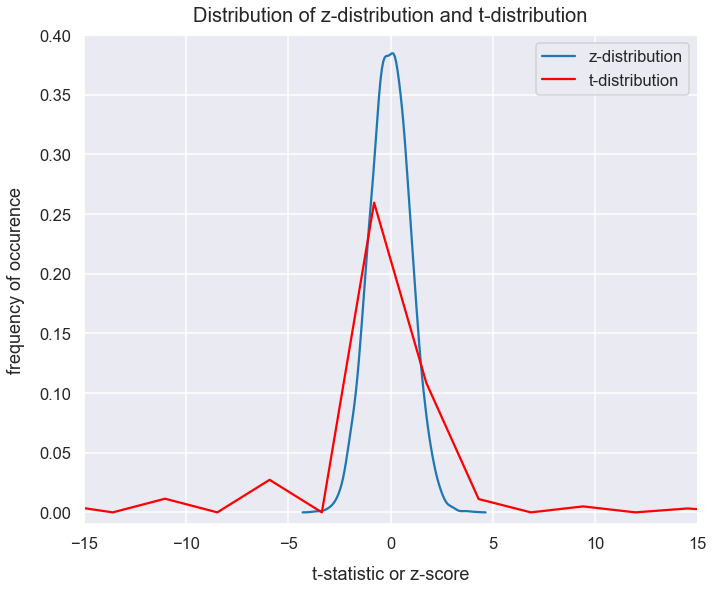

In [46]:
plt.figure(figsize=(11, 9))
z_distribution = np.random.normal(loc=0, size=6000)
t_distribution = np.random.standard_t(df=2, size=6000) # not a normal distribution
sns.distplot(z_distribution, hist=False, label='z-distribution')
sns.distplot(t_distribution, color='red', hist=False, label='t-distribution')
plt.ylabel("frequency of occurence", labelpad=14)
plt.xlabel("t-statistic or z-score", labelpad=14)
plt.title("Distribution of z-distribution and t-distribution", y=1.015, fontsize=20)
plt.xlim(-15, 15)
plt.ylim(-.01, .4)
plt.legend();

 The t-distribution has the following characteristics:

- mean = 0 
- fairly symmetrical
- typically not exactly normal given small $n$ values; a very high $n$ value will lead to a closer to normal distribution
- as $n$ increases, the sample standard deviation $s$ approaches the value of the population standard deviation $\sigma$
- $variance = v/(v-2)$ in which $v$ is the degrees of freedom and $v>2$ (degrees of freedom explained below)

T-test errors are more prone to errors in results than a z-test. The reason for this is that compared to the z-distribution, the t-distribution has larger variance. Visually we see a wider curve and thicker tails.

#### Calculate degrees of freedom

We utilize **degrees of freedom** in t-test calculations. Degrees of freedom is simply the freedom to vary. We have 28 students in Mr. Brown's class. If I hypothetically picked out grades for 27 of the students, you must pick out the *one* remaining student's grade. For any 28 student scores I pick, you have $28-1 = 27$ student's grades to choose from. In variable terms, this means if you have $n$ numbers to choose from, you have $n-1$ degrees of freedom.

In statistics, the calculation for degrees of freedom is the count of observations in the sample that are free to vary when estimating statistical parameters.

The t-distribution is defined by the degrees of freedom value and the alpha level.

Let's assign the variable `degrees_of_freedom` to be the degrees of freedom for students in Mr. Brown's class.

In [47]:
degrees_of_freedom = n-1
degrees_of_freedom

27

#### Calculate t-critical value

Similarities of a t-critical value to a z-score:

- identifies a boundary for a critical region of its respective distribution (for a t-test, the t-distribution)
- for a one-tailed test, there's *either* a positive or negative critical value with one tail probability
- for a two-tailed test, there's a positive *and* negative critical value with their respective tail probabilities

For a t-test, we utilize knowledge of the alpha level, direction of the test and degrees of freedom.

I'm familiar with two ways to calculate the t-critical value. One way is using a table and another is done programatically using Python. I prefer the latter.

<a href='https://udacity.com'>Udacity</a> hosts a table to identify t-critical values at <a href='https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg'>this page</a>. The values inside the table represent the t-critical values. Each row shows these t-critical values for a degrees of freedom (df) value. The columns are labeled for a right tail probability. This table can be used for one-tail and two-tail tests.

In Python, as part of the `Scipy` package and `t` class, there's a method called `ppf()` that returns the t-critical value. The arguments of the method are:

- `q` for the area under the curve of the t-distribution to the left of the t-critical value
- `df` for the degrees of freedom (equivalent to $n-1$ for a one sample t-test)

Below is the calculation for our guitar example in which we know the `alpha` value of $0.05$ is the area under the t-distribution to the left of the t-critical value. We want to assign `alpha` to `q` becuase this is a one-sided negative direction test.

In [48]:
t_critical_value = round(stats.t.ppf(q=alpha, df=degrees_of_freedom), 3)
t_critical_value

-1.703

The t-critical value should be negative because this is a one-sided negative direction t-test.

### 6) Determine if Data Meets Requirements for One Sample t-test

#### One Sample t-tests Data Requirements

- Each of the groups, the sample and population, have the *same* variable that is continous.

- Population and sample each have an approximate normal distribution.
    - Non-normal distributions, especially those with large variance and/or skewness heavily reduce the power of the results of the t-test.

- The sample should be randomly selected from a population.

- Assume sample data is representative of the whole population and can therefore estimate population parameters.

- Approximately equal variances of the population and sample.

#### Evaluate Data Requirements for Guitar Example

In this example, I'll assume we don't have access to each of the scores for the whole population of students. The population variance is also unknown.

Two requirements we can test with the data part of 1) sample has an approximate normal population and sample each have an approximate normal distribution.

Let's examine the distribution of the values in the sample with a histogram. I use the `Matplotlib` `hist()` <a href='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html'>method</a>. 

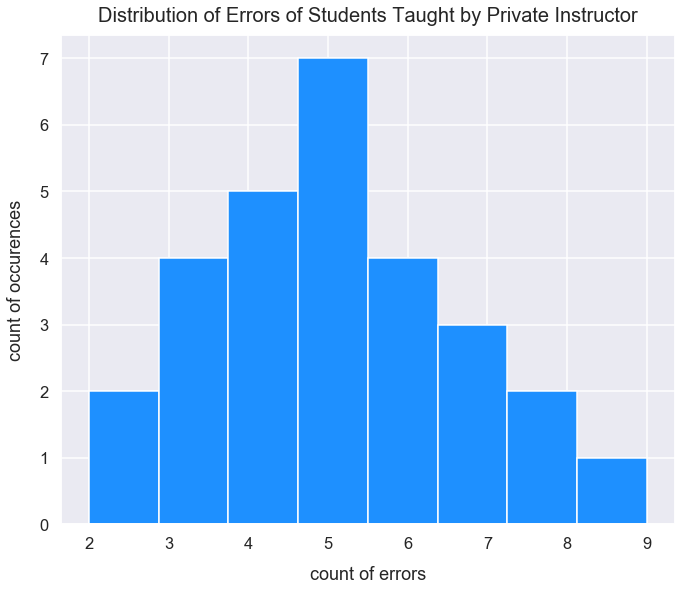

In [49]:
plt.figure(figsize=(11, 9))
plt.hist(sample_student_errors, bins=8, color='dodgerblue')
plt.title("Distribution of Errors of Students Taught by Private Instructor", y=1.015, fontsize=20)
plt.xlabel("count of errors", labelpad=14)
plt.ylabel("count of occurences", labelpad=14);

This distribution looks symmetrical, has no notable skew, and is centered around a central value.

In [50]:
sample_median_errors = np.median(sample_student_errors)
sample_mean_errors = np.mean(sample_student_errors)
print("Sample mean of {0} and median of {1}".format(sample_mean_errors, sample_median_errors))

Sample mean of 5.035714285714286 and median of 5.0


Above is the code that shows the sample mean and median are nearly the exact same too. Therefore, it's fairly safe to say that the sample has a normal distribution too.

### Calculate the t-statistic

Similar to z-tests in the calculation of a z-score, a t-test requires calculation of a t-statistic. A one-sample t-test helps determine if the mean of a population is *significantly* different than a sample mean. Both the sample and population have the same variable measurement. Remember, in a one-sample t-test, we don't know the population standard deviation so we cannot use that in the following calculation. The equation for the t-statistic for a one-sample t-test is:

$$t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$

- $\bar{x}$ is sample mean and is a point estimate
- $\mu$ is our *known* current population mean
- $s$ is the sample standard deviation (remember to use bessel's correction with $n-1$ in the denominator)
- $n$ is the sample size
- $\frac{s}{\sqrt{n}}$ is our expected standard deviation from a sampling distribution of means (term also called standard error of the means)

The t-statstic equation above has a numerator and denominator that can each be made sense of.

Remember the t-critical value is $-1.703$. The *smaller* the t-statistic, the more evidence we obtain to reject the null hypothesis and conclude Mr. Brown's students have *significantly fewer* errors than the general population.

The numerator measures the "strength" of the signal: the difference between the sample mean and population mean. In the guitar example, if Mr. Brown's students have far *fewer* errors than the general population, we'd expect a *smaller* numerator value and therefore more "strength". The difference:

In [51]:
numerator = sample_mean-population_mean_errors
numerator

-1.524285714285714

This value of $-1.52$ seems to indicate Mr. Brown's students do perform with fewer errors on average than the general population.

The denominator measures the variation or "noise" in the sample data. If hypothetically the errors of all $4$ students in Mr. Brown's class were $1$, $5$, $9$, and $18$ - that would be a lot of variation. This would equate so a high $s$ value. If hypothetically the errors of all $4$ students in Mr. Brown's class were $1$, $2$, $3$, and $5$ - that would be *less* variation and result in a small $s$ value. 

The amount of variation (value in the denominator) is "noisier" (a larger value) - for a smaller $n$ value. The demominator is also called the standard error.

In [52]:
standard_error = sample_std_dev/np.sqrt(n)
standard_error

0.34304172720851034

In [53]:
t_statistic = numerator/standard_error
t_statistic

-4.443441113387383

In the Python Scipy package, there's a <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html'>method</a> called `ttest_1samp()` that calculates the t-statistic and p-value for a one sample *two-sided* t-test. However, the guitar errors example is a *one-sided* negative direction test. Let's use the returned p-value from this method and multiply it by $2$ to get the p-value for a one-sided test.

In [54]:
results = stats.ttest_1samp(a=sample_student_errors, popmean=population_mean_errors)
results

Ttest_1sampResult(statistic=-4.443441113387382, pvalue=0.00013578924891219084)

In [55]:
two_sided_p_value = results[1]
one_sided_p_value = round(two_sided_p_value*2, 5)
one_sided_p_value

0.00027

This returned t-statistic from the manual calculation above is the same value returned from use of the `ttest_1samp` method.

#### Visualization of the t-distribution and a t-statistic

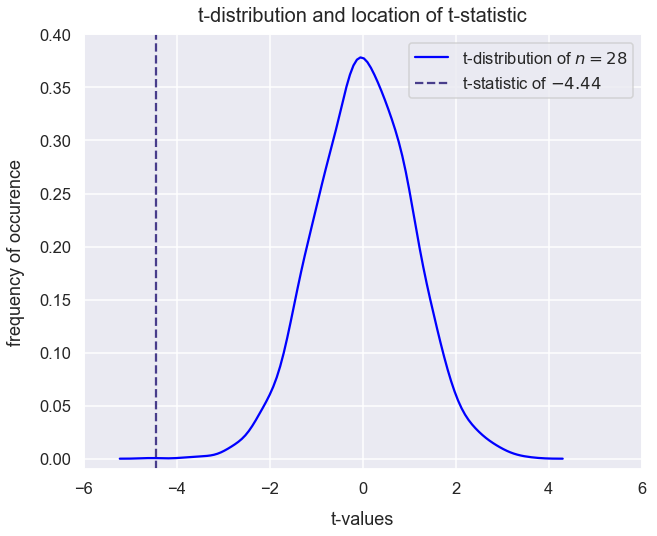

In [56]:
plt.figure(figsize=(10, 8))
np.random.seed(5)
t_distribution_df_28 = np.random.standard_t(n, size=3000)
sns.distplot(t_distribution_df_28, color='blue', hist=False, label='t-distribution of $n=28$')
plt.axvline(x=t_statistic, color='darkslateblue', linestyle='--', label='t-statistic of $-4.44$')
plt.xlabel("t-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("t-distribution and location of t-statistic", y=1.015, fontsize=20)
plt.ylim(-.01, .4)
plt.xlim(-6, 6)
plt.legend();

### 8) Interpret Results of Experiment

#### Conditions for Rejecting the Null Hypothesis

Similar to z-tests, with each t-test hypothesis, we want to determine if there is sufficient evidence to reject the null hypothesis. Below are details of hypothesis tests and means for evaluating one-sample t-tests.

null hypothesis | alternative hypothesis | alternative hypothesis interpretation | number of tails on t-distribution | tail(s) of t-distribution to reject the null
--- | --- | --- | --- | --- 
$\bar{x}>=\mu$ | $\bar{x}<\mu$ | the sample mean is less than the population mean | one | left
$\bar{x}<=\mu$ | $\bar{x}>\mu$ | the sample mean is greater than the population mean | one | right
$\bar{x}=\mu$ | $\bar{x}\neq\mu$ | no prediction on a direction for the difference between the sample mean and population mean | two | left or right

Here's what it means to reject the null hypothesis:

- The t-statistic falls within the t-critical region (bounded by the t-critical value)
    - For a one-tailed test in the positive direction, the t-statistic is greater than the t-critical value
    - For a one-tailed test in the negative direction, the t-statistic is less than the t-critical value
    - For a two-tailed test, the t-statistic is greater than the positive t-critical value *or* the t-statistic is less than the negative t-critical value
- The probability of obtaining the estimated population parameter due to random chance (the p-value) is less than the alpha level

#### Final Conclusion for Guitar Example

Given the table above, our guitar example is similar to the first row.

Ths t-statistic of $-4.44$ is less than the t-critical value of $-1.703$

Also, the p-value of $0.00027$ is less than the initial alpha level of $0.05$. This p-value tells us the probability of getting this t-statistic if the null hypothesis is true.

Therefore, there is sufficient evidence to reject the null hypothesis. Mr. Brown's students have *significantly* fewer errors in playing *Ziggy Stardust* than the general population of students who learned at the academy.

### Calculate a 95% Confidence Interval

This step is not *needed* for a t-test, but it offers additioanl valuable insights to our interpretation of the results.

A confidence interval provides a range of values in which there's a specified probability that the expected true population mean lies.

We performed a t-test with a sample of students from Mr. Brown and would like to *estimate* the population parameters for all students that would go through the same process of instruction by Mr. Brown.

Essentially, if the private teacher were to continually teach groups of 25 beginner students under the same circumstances as in the initial context, we'd expect 95% of those sample means to lie within what range? 

We can express the formula for the confidence interval for the expected population of mean errors by students for their performance of *Ziggy Stardust* after instruction by Mr. Brown as:

$$(\bar{x}_{\textrm{Mr. Brown}}+\textrm{t-critical value}*SE,\:\bar{x}_{\textrm{Mr. Brown}}-\textrm{t-critical value}*SE)$$

$\textrm{t-critical value}*SE$ is the **margin of error** and is 1/2 the width of our confidence interval. The margin of error is the number of standard errors away from the mean. 

Previously, we wanted a tail probability in the t-distribution of 0.05 but since we now want a 95% confidence interval, we'd like 0.025 probability in the tails. Therefore, we need a new t-critical value.

In [57]:
# retrieve value <= probability
tail_probability = 0.025
t_critical_value_for_95_CI =round(t.ppf(q=tail_probability, df=degrees_of_freedom), 2)
print("t-critical value is {0} for tail probability of {1} and degrees of freedom of {2}".format(t_critical_value_for_95_CI, tail_probability, degrees_of_freedom))

t-critical value is -2.05 for tail probability of 0.025 and degrees of freedom of 27


Let's calculate the 95% confidence interval using the equation above.

In [58]:
mean_lower_95_CI_bound = round(sample_mean + t_critical_value_for_95_CI*standard_error, 3)
mean_upper_95_CI_bound = round(sample_mean - t_critical_value_for_95_CI*standard_error, 3)
print("95% CI: ({0}, {1})".format(mean_lower_95_CI_bound, mean_upper_95_CI_bound))

95% CI: (4.332, 5.739)


Let's visualize the bounds of the 95% confidence interval and indicate the two distributions at each bound.

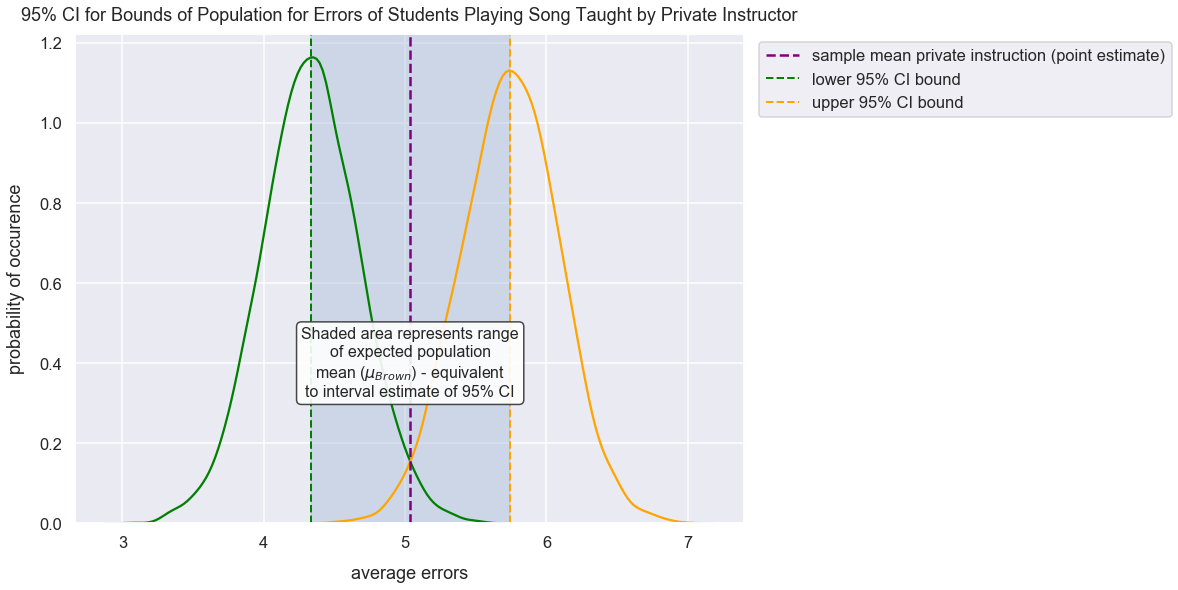

In [59]:
sampling_distribution_theoretical_values_lower = np.random.normal(loc=mean_lower_95_CI_bound, scale=standard_error, size=5000)
sampling_distribution_theoretical_values_upper = np.random.normal(loc=mean_upper_95_CI_bound, scale=standard_error, size=5000)
plt.figure(figsize=(12, 9))
sns.distplot(sampling_distribution_theoretical_values_lower, color="g", hist=False)
sns.distplot(sampling_distribution_theoretical_values_upper, color="orange", hist=False)
plt.axvspan(mean_lower_95_CI_bound, mean_upper_95_CI_bound, alpha=0.5, color='lightsteelblue')
bbox_props = dict(boxstyle="round", fc="w", ec="0.2", alpha=0.9)
plt.text(sample_mean, 0.4, "Shaded area represents range\nof expected population\nmean ($\mu_{Brown}$) - equivalent\nto interval estimate of 95% CI", ha="center", 
         va="center", size=16, bbox=bbox_props)
plt.axvline(x=sample_mean, linestyle='--', linewidth=2.5, label="sample mean private instruction (point estimate)", c='purple')
plt.axvline(x=mean_lower_95_CI_bound, linestyle='--', linewidth=2, c='g', label='lower 95% CI bound')
plt.axvline(x=mean_upper_95_CI_bound, linestyle='--', linewidth=2, c='orange', label='upper 95% CI bound')
plt.xlabel("average errors", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("95% CI for Bounds of Population for Errors of Students Playing Song Taught by Private Instructor", y=1.015)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

### Visualization of Change in t-critical Value with Change in Degrees of Freedom

For an alpha level, as the degrees of freedom increases past $22$, there is little change in the corresponding t-critical value.

Thus, if I wanted to run a one sample t-test, I would likely just get a sample of roughly size $23$ which equates to a degree of freedom of $22$. I'd only opt to retrive a larger sample if retrieving that data was easy. 

Below is a visualization that shows the change in t-critical value as the sample size increases for a one sample t-test in the positive direction with an alpha level of $0.05$. 

In [60]:
t_critical_values = []
degree_of_freedom_values = list(range(4, 200))
for df_value in degree_of_freedom_values:
    t_critical_value = t.ppf(q=0.95, df=df_value)
    t_critical_values.append(t_critical_value)

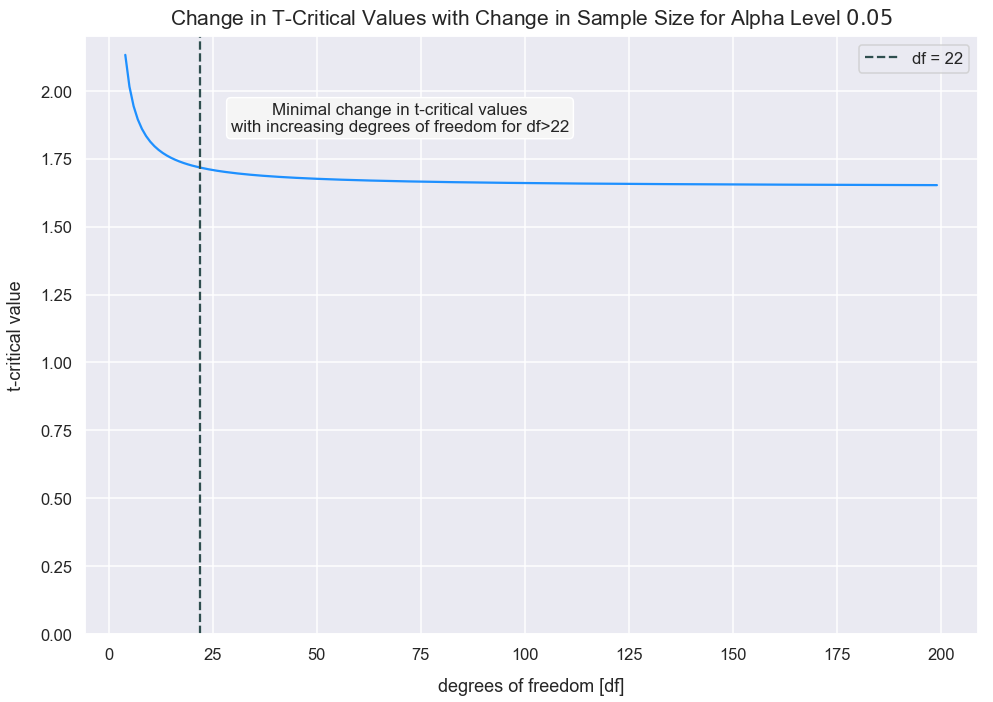

In [61]:
plt.figure(figsize=(16, 11))
plt.plot(degree_of_freedom_values, t_critical_values, color='dodgerblue')
plt.axvline(x=22, label='df = 22', color='darkslategray', linestyle='--')
plt.legend()
plt.text(x=70, y=1.85, horizontalalignment='center', fontsize=17, 
         s="Minimal change in t-critical values\nwith increasing degrees of freedom for df>22", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.xlabel("degrees of freedom [df]", labelpad=15)
plt.ylabel("t-critical value", labelpad=15)
plt.title("Change in T-Critical Values with Change in Sample Size for Alpha Level $0.05$", y=1.01, fontsize=21)
plt.ylim(0, 2.2);

The t-critical value barely decreases with increasing degrees of freedom past $22$.